### Welcome to the Airbnb Mini Practice Project

As you've worked through Python Sub Unit you would have realised there are a number of powerful functions you can use.

You would have covered the following libraries:

<li> Matplotlib </li>
<li> Seaborn </li>
<li> Pandas </li> 
    
These are all powerful libraries to help augment your data analysis capabilities.
In these set of exercises below, we've crafted a few extra challenges to reinforce your understanding of how these libraries work. 

Please note there is a particular emphasis on the Pandas Library as this is the most critical library you will be using throughout your career as a data analyst. You'll see the similarities that hold with respect to Pandas and Pivot Tables!
    
<b> The most important thing to build confidence with Python is to practice all the time. This way you will build muscle memory. Don't simply copy the code you've written previously but write it again and again so you build the muscle memory associated with these coding libraries. </b> 

<H3>  Let's get started! </H3>

We've provided a file called airbnb_2.csv that you'll need to import.

Let's do this first before we start our analysis.

<b> Don't forget to import the libraries you need to read .csv files! </b> 



### Step 1: <span style="color:green">Import Libraries</span> 
<b> Put your code in the box below </b>


In [1]:
import pandas as pd

### Step 2: <span style="color:green">Import the Airbnb Dataset</span> 

Now that you have the Pandas Libraries imported, it's time to import the airbnb dataset.

<b> i) Please import the airbnb dataset.

ii) Upon completion of this, use .info() to better understand the variables inside your dataset.
<p>    

<b> Put your code in the box below </b>

In [2]:
airbnb = pd.read_csv('airbnb_2.csv')

In [3]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Step 3: <span style="color:green">Exploring your data with Pandas</span> 

The rest of these questions will have you focus on using the following Pandas Skills:

<li> Subsetting a Pandas dataframe using [] and boolean operators </li>
<li> Summing up Records with value_counts()</li>
<li> Creating calculated fields </li>
<li> Group By in Pandas </li> 
<li> Creating Bar Plots with Matplotlib</li> 



<b> i)  Please count how many airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island) and identify which Neighbourhood Groups has the largest number of Airbnb Listings </b>
<p>
    <b> Put your code in the box below </b>

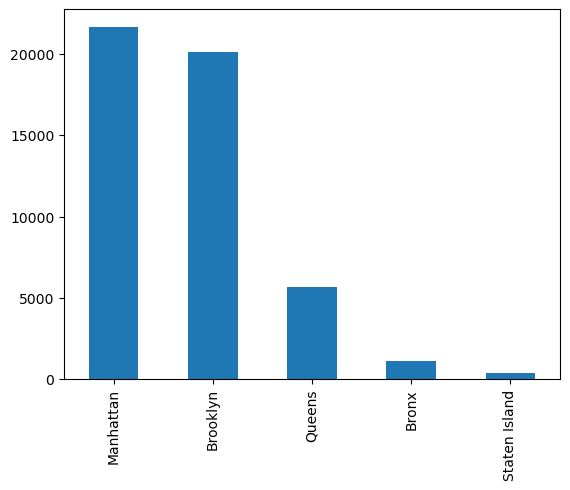

In [4]:
import matplotlib.pyplot as plt
neighbour_group = airbnb['neighbourhood_group'].value_counts()
neighbour_group.plot(kind='bar')
plt.show()

We want to focus our attention on the Neighbourhood Groups that have the top 3 number of Airbnb Listings.

<b> ii) Calculate the % listings that each Neighbourhood Group contains. </b>

<b> Put your code in the box below </b>

In [5]:
airbnb['neighbourhood_group'].value_counts(normalize=True)

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

<b> iii) Create a new calculated field called Revenue and place this into the Airbnb Dataframe. This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>

<b> Put your code in the box below </b>

In [7]:
airbnb['revenue']=airbnb['price'] * airbnb['number_of_reviews']

<b> iv) Create a Bar Plot that shows which Neighbourhood Group has the highest average revenues. In order to best
calculate this, you'd want to consider how you can use the .groupby() syntax to assist you! </b>

If you're stuck, we recommend you go back to <a href = https://learn.datacamp.com/courses/manipulating-dataframes-with-pandas> this </a> datacamp link. Specifically Chapter 4 which covers how GROUP BY is used in Pandas.

<b> Put your code in the box below </b>

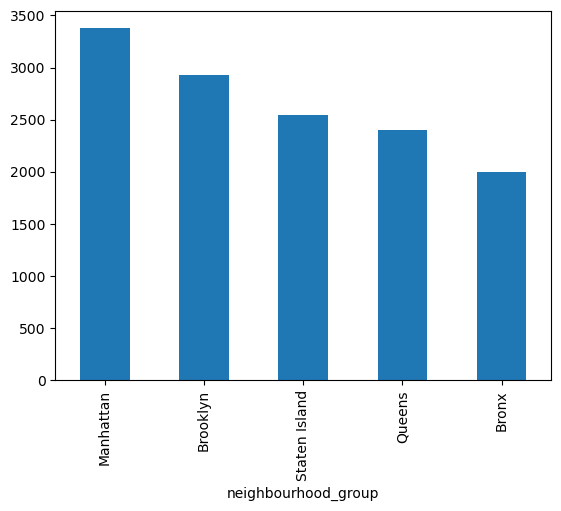

In [21]:
avg_revenues = airbnb.groupby('neighbourhood_group')['revenue'].mean().sort_values(ascending=False)
avg_revenues.plot(kind='bar')
plt.show()


<h3> <span style="color:green">Challenge Questions</span> </h3>

<b> V) Filter the Airbnb Dataframe to include only the Neighbourhood Groups Manhattan, Brookly and Queens. 
    
Upon completion of this, identify the top 3 Revenue Generating Neighborhoods within each of the three Neighbourhood_Groups. This should give us 9 Overall Rows: 3 of the top generating neighbourhoods within each of the 3 Neighbourhood_Groups </b>

This is a tricky question that will *test* your group-by skills.

We recommend you consider the following:

    condition1 = someDataFrame['someColumn']=='someCondition'
    condition2 = someDataFrame['someColumn']=='someCondition'
    
    Step One - Filter the Dataframe using the Conditions
    filtered_dataframe = someDataFrame[condition1 OR condition 2] 
    #Hint: You might want to look up what the OR symbol in Python is represented as in operator form (i.e. AND (&) )
    
    Step Two - Group the Data by Neighbourhood_Group and Neighbourhood. Don't forget you're looking to SUM up the Revenues.
    
    The remaining steps we recommend you think very carefully about.
    
    You might want to make use of the .reset_index(inplace=True) function to help reset the indexes in 
    your Grouped Up Dataframe...!
    
    
<b> Put your code in the box below </b>

In [27]:
manhattan = airbnb['neighbourhood_group'] == 'Manhattan'
brooklyn = airbnb ['neighbourhood_group'] == 'Brooklyn'
queens = airbnb ['neighbourhood_group'] == 'Queens'
filtered_neighbour = airbnb[manhattan | brooklyn | queens]
top_three_neighbour = filtered_neighbour.groupby(['neighbourhood_group', 'neighbourhood'])['revenue'].sum().sort_values(ascending=False).reset_index()
top_three_neighbour.groupby('neighbourhood_group').head(3)

,neighbourhood_group,neighbourhood,revenue
0,Brooklyn,Williamsburg,12389011
1,Brooklyn,Bedford-Stuyvesant,12352457
2,Manhattan,Harlem,8598692
3,Manhattan,Hell's Kitchen,8238991
4,Manhattan,East Village,7574535
8,Brooklyn,Bushwick,4762224
17,Queens,Astoria,1880840
28,Queens,Long Island City,1374945
33,Queens,Flushing,1140450


<b> VI) Building on the previous question where you identified the top 3 Neighbourhoods within each of the three neighbourhood_groups based off Revenues, please filter the Airbnb Dataframe to include only these neighbourhoods. 
    
Upon completion of this, identify the  top average revenue generating room type for each of the nine neighbourhoods and plot this out in a Bar Chart.</b>

This is a tricky question that will *test* your group-by skills. Think back to the previous question and how you approached this; you can approach this in a similar manner. 

We recommend you consider the following:

    condition1 = someDataFrame['someColumn']=='someCondition'
    condition2 = someDataFrame['someColumn']=='someCondition'
    
    Step One - Filter the Dataframe using the Conditions
    filtered_dataframe = someDataFrame[condition1 OR condition 2] 
    #Hint: You might want to look up what the OR symbol in Python is represented as in operator form (i.e. AND (&) )
    
    Step Two - Group the Data by Neighbourhood_Group and Neighbourhood. Don't forget you're looking to SUM up the Revenues.
    
    The remaining steps we recommend you think very carefully about.
    
    You might want to make use of the .reset_index(inplace=True) function to help reset the indexes in 
    your Grouped Up Dataframe...!
    
    
 <b> Put your code in the box below </b>      

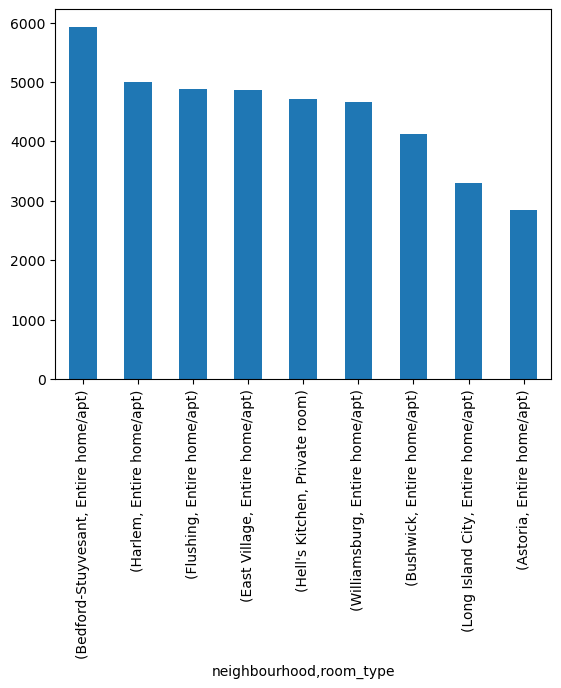

In [45]:
condition1=airbnb['neighbourhood'] == 'Williamsburg'
condition2=airbnb['neighbourhood'] == 'Bedford-Stuyvesant'
condition3=airbnb['neighbourhood'] == 'Harlem'
condition4=airbnb['neighbourhood'] == "Hell's Kitchen"
condition5=airbnb['neighbourhood'] == 'East Village'
condition6=airbnb['neighbourhood'] == 'Bushwick'
condition7=airbnb['neighbourhood'] == 'Astoria'
condition8=airbnb['neighbourhood'] == 'Long Island City'
condition9=airbnb['neighbourhood'] == 'Flushing'

step1=airbnb[condition1|condition2|condition3|condition4|condition5|condition6|condition7|condition8|condition9]
step2=step1.groupby(['neighbourhood', 'room_type'])['revenue'].mean().sort_values(ascending=False)
step2.groupby('neighbourhood').head(1).plot(kind='bar')
plt.show()